Enter movies names seperated by ',': Shawshank Redemption,Godfather,Inception,12 Angry Men,Pulp Fiction


,moive no.1,moive no.2,moive no.3,moive no.4,moive no.5
1,"""Trailer Trash"" Shawshank Redemption (2011)",The Godfather (1972),Inception (2010),12 Angry Men (1957),Pulp Fiction (1994)
2,"""Dating a Puppet"" Shawshank Redemption (2013)",Godfather (1991),Inception (2014),12 Angry Men (1997) (TV),"""Where It Was Made"" Pulp Fiction (2015)"
3,The Shawshank Redemption (1994),Varalaaru (2006),"""Zoom In"" Inception (2010)","""All Positive Reviews"" 12 Angry Men (2020)","""Twist the Web Series"" Pulp Fiction (2016)"
4,"""Honest Trailers"" The Shawshank Redemption (2021)",The Godfather: Part II (1974),Inception: The Cobol Job (2010) (V),Cries of the Unborn (2017),Pulp Fiction: The Facts (2002) (V)
5,"""Lost in Adaptation"" The Shawshank Redemption ...","""Godfather of Harlem"" (2019)",Inception: Jump Right Into the Action (2010) (V),12 Angry Men: The Television Version (2011) (V),Pulp Fiction Art: Cheap Thrills & Painted Nigh...
6,"""The Amazing Race Israel"" The Shawshank Redemp...",The Godfather: Part III (1990),"""Inception: Motion Comics"" (2010)",12 Angry Men: From TV to the Big Screen (2011)...,Pulp Fiction Breakfast (2020)
7,"""Beyond the Blockbusters"" The Shawshank Redemp...",Black Caesar (1973),Inception of a lost Art (2013),12 Angry Men: Teams That Don't Quit (1999),Vincent & Mia (2012)
8,"""All Positive Reviews"" The Shawshank Redemptio...",Hell Up in Harlem (1973),Inception: 4Movie Premiere Special (2010) (TV),"""ShitFlix"" 12 Angry Men (2013)",Pulp Fiction Russian Parody (2014)
9,"""Chris Stuckmann Movie Reviews"" The Shawshank ...",3 Godfathers (1948),Deception (I) (2008),"""Chris Stuckmann Movie Reviews"" 12 Angry Men (...",Pulpfiction (2009)
10,"""Casting Calls"" 'The Shawshank Redemption' (2019)",Blood Father (2016),"""Perception"" (2012)","""Projecting"" 1 + 2 Angry Men (2017)","""30-Second Bunny Theatre"" Pulp Fiction (2010)"


Choose a movie from each column seperated by "space" e.g.(15 1 6 ....): 3 1 1 1 1


,IMDB_Rating,IMDB_Votes,Metacritic,RT_Crtitics,RT_Crtitics_Count,RT_Audience,RT_Audience_Count
Pulp Fiction (1994),89,1872953,94,100,55,97,105563
The Godfather (1972),92,1669206,100,97,132,98,734371
Inception (2010),88,2128041,74,97,132,98,734371
The Shawshank Redemption (1994),93,2412672,80,91,77,98,886934
12 Angry Men (1957),90,710982,96,87,361,91,571685


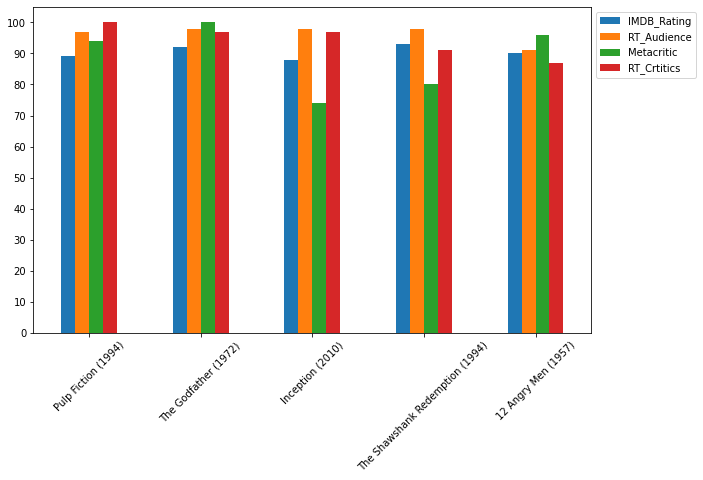

In [9]:
from imdb import IMDb
from rotten_tomatoes_client import RottenTomatoesClient as rt
import requests
from PIL import Image
from io import BytesIO
from bs4 import BeautifulSoup
import json
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display


# create an instance of the IMDb class
ia = IMDb()

def movie_search():
    movies = []
    movies_list = []
    movies_dict = dict()
    movies_names = input("Enter movies names seperated by ',': ").split(',')
    labels = ['moive no.'+str(i+1) for i in range(len(movies_names))]
        
    for i, name in enumerate(movies_names):
        movies.append(ia.search_movie(name, results=15))
        movies_list = [movies[i][j]["long imdb title"] for j in range(len(movies[i]))]
        if len(movies_list) < 15:
            movies_list = movies_list + [''] * (15 - len(movies_list))
        movies_dict[labels[i]] = movies_list
        movies_list = []

    df_movies_search = pd.DataFrame(movies_dict)
    df_movies_search.index += 1
    display(df_movies_search.head(20))
    return movies


def movies_selection(movies):
    indexes = input('Choose a movie from each column seperated by "space" e.g.(15 1 6 ....): ').split()
    indexes = [int(i)-1 for i in indexes]
    movies_ids = [movies[i][j].movieID for i,j in enumerate(indexes)]
    movies_names = [movies[i][j]["long imdb title"] for i,j in enumerate(indexes)]
    return movies_ids, movies_names


def get_ratings_imdb(movies_ids, the_movies):
    rating = []
    votes = []
    metacritic = []
    for mov_num, curr_id in enumerate(movies_ids):

        try:
            meta_score = int(ia.get_movie_critic_reviews(curr_id)["data"]["metascore"])
            metacritic.append(meta_score)
        except:
            meta_score = 0
            metacritic.append(meta_score)

        rating.append(int(the_movies[mov_num]["rating"]*10))
        votes.append(the_movies[mov_num]["votes"])
        
    return rating, votes, metacritic


def get_rt_urls(the_movies):
    urls = []
    
    for mov_num in range(len(the_movies)):
        rotten_cast = []
        year = the_movies[mov_num]["year"]
        
        rotten = rt.search(the_movies[mov_num]['title'].lower())

        imdb_cast = [the_movies[mov_num]["cast"][i]['name'] for i in range(len(the_movies[mov_num]["cast"]))]
        
        for i in range(len(rotten["movies"])):
            if year - 1 <= rotten["movies"][i]["year"] <= year + 1:
                for j in range(len(rotten["movies"][i]['castItems'])):
                    rotten_cast.append(rotten["movies"][i]['castItems'][j]['name'])

                if len(set(rotten_cast).intersection(set(imdb_cast))) > 0:
                    urls.append("https://www.rottentomatoes.com" + rotten["movies"][i]["url"])
                else:
                    urls.append('')
            rotten_cast = []
            
    return urls



def get_rt_ratings(urls):
    critics_score = []
    critics_score_count = []
    aud_score = []
    aud_score_count = []
    
    for url in urls:
        if len(url) < 1:
            critics_score.append(0)
            critics_score_count.append(0)
            aud_score.append(0)
            aud_score_count.append(0)
            continue
            
        try:
            page = requests.get(url)
            soup = BeautifulSoup(page.content, 'html.parser')
            data = json.loads(list(soup.find(id="score-details-json").children)[0])
            c_score = data['modal']['tomatometerScoreAll']
            a_score = data["modal"]["audienceScoreVerified"]
            if data["modal"]["audienceScoreVerified"]['averageRating'] is None:
                a_score = data["modal"]['audienceScoreAll']
        except:
            pass

        try:
            critics_score.append(int(c_score["score"]))
        except: 
            critics_score.append(0)
        try:
            critics_score_count.append(c_score["ratingCount"])
        except: 
            critics_score_count.append(0)


        try:
            aud_score.append(int(a_score["score"]))
        except: 
            aud_score.append(0)
        try:
            aud_score_count.append(a_score["ratingCount"])
        except: 
            aud_score_count.append(0)
            
    return critics_score, critics_score_count, aud_score, aud_score_count



movies = movie_search()

movies_ids, movies_names = movies_selection(movies)

the_movies = [ia.get_movie(movie_id) for movie_id in movies_ids]

imdb_rating, imdb_votes, imdb_metacritic = get_ratings_imdb(movies_ids, the_movies)

urls = get_rt_urls(the_movies)

rt_critics_score, rt_critics_score_count, rt_aud_score, rt_aud_score_count = get_rt_ratings(urls)

movies_details = [[i,j,k,l,m,n,x] for i,j,k,l,m,n,x in zip(imdb_rating, imdb_votes, imdb_metacritic, rt_critics_score, 
                                                           rt_critics_score_count, rt_aud_score, rt_aud_score_count)]

movies_details = pd.DataFrame(movies_details)
movies_details.columns = ['IMDB_Rating', 'IMDB_Votes', 'Metacritic', 'RT_Crtitics', 'RT_Crtitics_Count',
                          'RT_Audience', 'RT_Audience_Count']
movies_details.index = movies_names
movies_details = movies_details.sort_values(by='RT_Crtitics', ascending=False)
display(movies_details)

movies_details.plot(kind='bar', y=['IMDB_Rating', 'RT_Audience', 'Metacritic', 'RT_Crtitics'], figsize=(10,6))
plt.xticks(rotation=45)
plt.yticks(list(range(0, 110, 10)))
plt.legend(bbox_to_anchor=(1, 1))
plt.show();